In [244]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [229]:
data = pd.read_csv('flights_data.csv')

In [230]:
print(data.shape)
data.head(20)

(10683, 11)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration(minutes),Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,145,0,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,930,1,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,1265,1,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,1530,1,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,470,1,No info,8625


In [233]:
#Duration(minutes) --> Duration_in_mins
df = df.rename(columns={'Duration(minutes)': 'Duration_in_mins'})
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration_in_mins,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1,No info,13302


In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Date_of_Journey   10683 non-null  object
 2   Source            10683 non-null  object
 3   Destination       10683 non-null  object
 4   Route             10667 non-null  object
 5   Dep_Time          10683 non-null  object
 6   Arrival_Time      10683 non-null  object
 7   Duration_in_mins  10683 non-null  int64 
 8   Total_Stops       10656 non-null  object
 9   Additional_Info   10683 non-null  object
 10  Price             10683 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 918.2+ KB


In [235]:
numerics = ['int16' , 'int32' , 'int64' , 'float16' , 'float32' , 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

2

In [236]:
df.describe()

,Duration_in_mins,Price
count,10683.000000,10683.000000
mean,643.120846,9051.087616
std,507.835322,4367.419038
min,75.000000,1759.000000
25%,170.000000,5277.000000
50%,520.000000,8372.000000
75%,930.000000,12373.000000
max,2860.000000,27000.000000


In [237]:
df.isna().sum()

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route               16
Dep_Time             0
Arrival_Time         0
Duration_in_mins     0
Total_Stops         27
Additional_Info      0
Price                0
dtype: int64

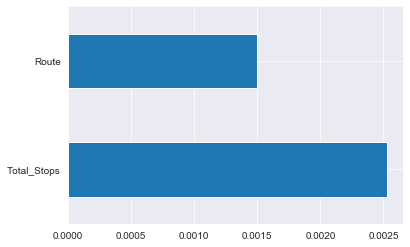

In [238]:
missing_percentage = df.isna().sum().sort_values(ascending=False)/len(df)
missing_percentage[missing_percentage !=0].plot(kind="barh") #It will show only data with NAN missing values

In [239]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration_in_mins', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

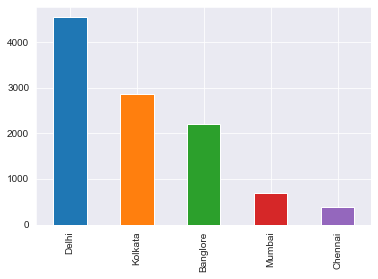

In [240]:
df.Source.value_counts().plot(kind="bar", color=['C0', 'C1', 'C2', 'C3', 'C4'])

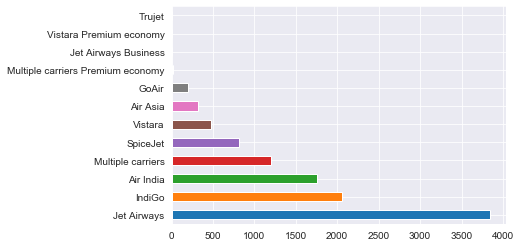

In [241]:
df.Airline.value_counts().plot(kind="barh",color=['C0', 'C1', 'C2', 'C3', 'C4','C5','C6','C7'])

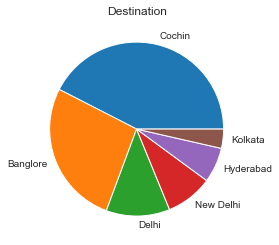

In [242]:
df.Destination.value_counts().plot(kind="pie",label="",title="Destination")

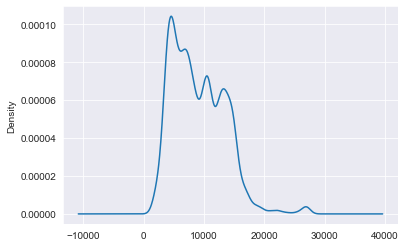

In [243]:
df.Price.plot(kind="density")

(-1.106196680247508,
 1.123140553037034,
 -1.1032616093291103,
 1.1260756239554317)

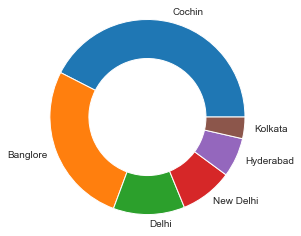

In [213]:
destination_plot = df.Destination.value_counts()
plt.pie(destination_plot, labels=destination_plot.index, wedgeprops={'width':0.4})
plt.axis('square')

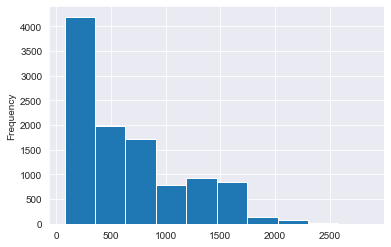

In [251]:
df.Duration_in_mins.plot(kind="hist")

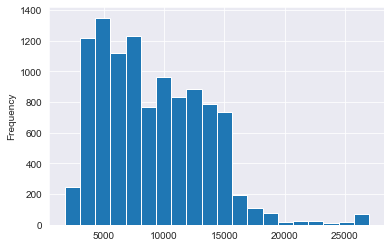

In [259]:
flight_price = df.Price
flight_price.plot(kind="hist",bins=20)

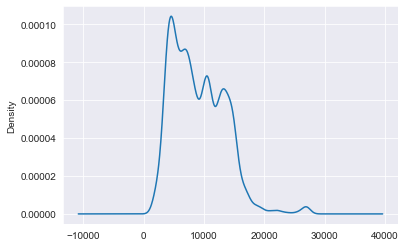

In [275]:
flight_price.plot(kind="kde")

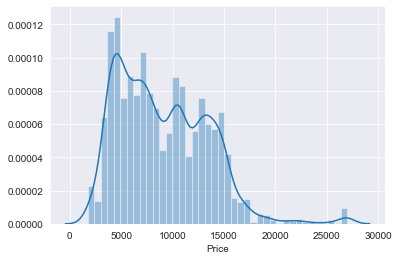

In [276]:
sns.distplot(flight_price)

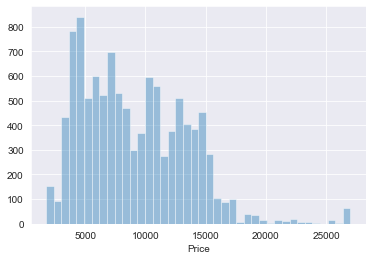

In [277]:
sns.distplot(flight_price,kde=False)